# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
#import numpy and pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import norm

# Challenge 1 - The `stats` Submodule

This submodule contains statistical functions for conducting hypothesis tests, producing various distributions and other useful tools. Let's examine this submodule using the KickStarter dataset. We will load the dataset below.

In [2]:
# Run this code:

kickstarter = pd.read_csv('../ks-projects-201801.csv')

Now print the `head` function to examine the dataset.

In [3]:
# Your code here:
kickstarter.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


Import the `mode` function from `scipy.stats` and find the mode of the `country` and `currency` column.

In [4]:
# Your code here:
country = kickstarter['country']
currency = kickstarter['currency']

print("Country mode:", country.mode()[0])
print("Currency mode:", currency.mode()[0])

Country mode: US
Currency mode: USD


The trimmed mean is a function that computes the mean of the data with observations removed. The most common way to compute a trimmed mean is by specifying a percentage and then removing elements from both ends. However, we can also specify a threshold on both ends. The goal of this function is to create a more robust method of computing the mean that is less influenced by outliers. SciPy contains a function called `tmean` for computing the trimmed mean. 

In the cell below, import the `tmean` function and then find the 75th percentile of the `goal` column. Compute the trimmed mean between 0 and the 75th percentile of the column. Read more about the `tmean` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tmean.html#scipy.stats.tmean).

In [26]:
# Your code here:
from scipy.stats import tmean

percentil75 = ss.tmean(kickstarter['goal'],(0, kickstarter['goal'].quantile(0.75)))
print("Percentil 75%:", percentil75)

Percentil 75%: 4874.150287106898


#### SciPy contains various statistical tests. One of the tests is Fisher's exact test. This test is used for contingency tables. 

The test originates from the "Lady Tasting Tea" experiment. In 1935, Fisher published the results of the experiment in his book. The experiment was based on a claim by Muriel Bristol that she can taste whether tea or milk was first poured into the cup. Fisher devised this test to disprove her claim. The null hypothesis is that the treatments do not affect outcomes, while the alternative hypothesis is that the treatment does affect outcome. To read more about Fisher's exact test, click [here](https://en.wikipedia.org/wiki/Fisher%27s_exact_test).

Let's perform Fisher's exact test on our KickStarter data. We intend to test the hypothesis that the choice of currency has an impact on meeting the pledge goal. We'll start by creating two derived columns in our dataframe. The first will contain 1 if the amount of money in `usd_pledged_real` is greater than the amount of money in `usd_goal_real`. We can compute this by using the `np.where` function. If the amount in one column is greater than the other, enter a value of 1, otherwise enter a value of zero. Add this column to the dataframe and name it `goal_met`.

In [30]:
# Your code here:
import scipy.stats as stats

kickstarter['goal_met'] = np.where(kickstarter['usd_pledged_real'] > kickstarter['usd_goal_real'], 1, 0)
kickstarter.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


Next, create a column that checks whether the currency of the project is in US Dollars. Create a column called `usd` using the `np.where` function where if the currency is US Dollars, assign a value of 1 to the row and 0 otherwise.

In [31]:
# Your code here:
kickstarter['usd'] = np.where(kickstarter.currency == "USD", 1, 0)
kickstarter.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0,0
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0,1
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0,1
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0,1
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0,1


Now create a contingency table using the `pd.crosstab` function in the cell below to compare the `goal_met` and `usd` columns.

Import the `fisher_exact` function from `scipy.stats` and conduct the hypothesis test on the contingency table that you have generated above. You can read more about the `fisher_exact` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html#scipy.stats.fisher_exact). The output of the function should be the odds ratio and the p-value. The p-value will provide you with the outcome of the test.

In [35]:
# Your code here:
from scipy.stats import fisher_exact

contingency_table = pd.crosstab('goal_met', 'usd')

ratio, p-value = stats.fisher_exact(contingency_table)

print("The null hipotesys variable: ",p-value)



# Challenge 2 - The `linalg` submodule

This submodule allows us to perform various linear algebra calculations. 

Using the solve function, find the solution of the equation system 5x + 2y = 3 and 3x + y = 2 in the cell below.

In [9]:
# Your code here:
from scipy.linalg import solve

a = np.array([[5, 2], [3, 1]])
b = np.array([3, 2])
x = solve(a, b)

print("Value of variable x is ",x[0],"and the value of variable y is",x[1])

Value of variable x is  0.9999999999999991 and the value of variable y is -0.9999999999999978


# Challenge 3 - The `interpolate` submodule

This submodule allows us to interpolate between two points and create a continuous distribution based on the observed data.

In the cell below, import the `interp1d` function and first take a sample of 10 rows from `kickstarter`. 

In [39]:
# Your code here:
from scipy import interpolate

kickstarter_sample = kickstarter.sample(n=10) #choose 10 values from de column
kickstarter_sample.head(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,goal_met,usd
183984,1936727679,Observations of a Wandering Fool,Publishing,Publishing,USD,2016-05-09,110000.0,2016-03-10 01:46:29,10.00,failed,1,US,10.00,10.00,110000.00,0,1
93326,1474394774,Die Landsknechte zu Schadeck brauchen eure Unt...,Crafts,Crafts,EUR,2017-03-31,1000.0,2017-03-07 18:30:36,189.00,failed,9,DE,37.10,202.06,1069.10,0,0
288852,539729896,Miracle Evidence Documentary,Film & Video,Film & Video,USD,2015-12-18,116500.0,2015-11-16 18:21:39,132500.55,successful,1549,US,132500.55,132500.55,116500.00,1,1
18000,109134731,Share My Art With the World!,Mixed Media,Art,USD,2014-10-25,1500.0,2014-09-25 14:03:34,0.00,failed,0,US,0.00,0.00,1500.00,0,1
271710,452475267,Stir Fry Empire's First Music Video,Rock,Music,USD,2015-03-05,300.0,2015-02-03 23:45:53,2.00,failed,2,US,2.00,2.00,300.00,0,1
325334,726986877,Pimp My Mouse (Canceled),Hardware,Technology,USD,2011-07-09,13707.0,2011-05-18 08:02:38,45.00,canceled,1,US,45.00,45.00,13707.00,0,1
349267,849489381,Will you help save the ODD ONE OUT?,Fiction,Publishing,USD,2012-03-06,4005.1,2012-02-05 23:18:46,132.00,failed,5,US,132.00,132.00,4005.10,0,1
154418,1785065186,Planet Graffiti Bad News Album Promo Launch an...,Rock,Music,GBP,2013-04-14,4300.0,2013-03-21 18:12:53,275.00,failed,5,GB,415.01,422.12,6600.46,0,0
131302,1666467666,Journey to India - A Tribute to Bhagavan Sri S...,Nonfiction,Publishing,USD,2012-05-12,49995.0,2012-04-12 18:36:27,125.00,failed,2,US,125.00,125.00,49995.00,0,1
272122,454500627,Revelation,Webseries,Film & Video,USD,2017-04-28,5000.0,2017-03-29 16:00:22,1.00,failed,1,US,0.00,1.00,5000.00,0,1


Next, create a linear interpolation of the backers as a function of `usd_pledged_real`. Create a function `f` that generates a linear interpolation of backers as predicted by the amount of real pledged dollars.

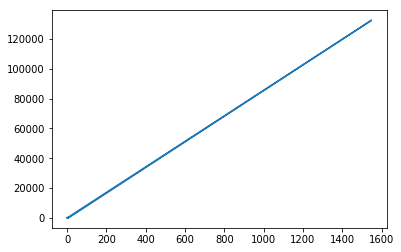

In [51]:
# Your code here:
from scipy.interpolate import interp1d

x = kickstarter_sample.backers
y = kickstarter_sample.usd_pledged_real
f = interpolate.interp1d(x, y)
"""
xnew = np.arange(0, len(y), )
ynew = f(xnew)   # use interpolation function returned by `interp1d`
"""

plt.plot(x,y)
plt.show()



Now create a new variable called `x_new`. This variable will contain all integers between the minimum number of backers in our sample and the maximum number of backers. The goal here is to take the dataset that contains few obeservations due to sampling and fill all observations with a value using the interpolation function. 

Hint: one option is the `np.arange` function.

[   0.           31.6122449    63.2244898    94.83673469  126.44897959
  158.06122449  189.67346939  221.28571429  252.89795918  284.51020408
  316.12244898  347.73469388  379.34693878  410.95918367  442.57142857
  474.18367347  505.79591837  537.40816327  569.02040816  600.63265306
  632.24489796  663.85714286  695.46938776  727.08163265  758.69387755
  790.30612245  821.91836735  853.53061224  885.14285714  916.75510204
  948.36734694  979.97959184 1011.59183673 1043.20408163 1074.81632653
 1106.42857143 1138.04081633 1169.65306122 1201.26530612 1232.87755102
 1264.48979592 1296.10204082 1327.71428571 1359.32653061 1390.93877551
 1422.55102041 1454.16326531 1485.7755102  1517.3877551  1549.        ]


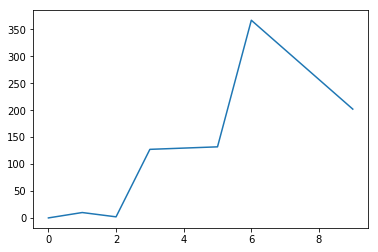

In [56]:
# Your code here:

xnew = np.linspace(kickstarter_sample.backers.min(),kickstarter_sample.backers.max()) 

f = interpolate.interp1d(x, y)
"""
print(xnew)

xnew = np.arange(0, len(y))
ynew = f(xnew)   # use interpolation function returned by `interp1d`

plt.plot(xnew,ynew)
plt.show()
"""


Plot function f for all values of `x_new`. Run the code below.

In [16]:
# Run this code:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.arange(0,10)
y = np.exp(x/3.0)
f = interpolate.interp1d(x, y)
xnew = np.arange(0, 10.25, 0.25)
plt.plot(xnew, f(xnew))



ValueError: A value in x_new is above the interpolation range.

Next create a function that will generate a cubic interpolation function. Name the function `g`

In [ ]:
# Your code here:



In [ ]:
# Run this code:

plt.plot(x_new, g(x_new))

# Bonus Challenge - The Binomial Distribution

The binomial distribution allows us to calculate the probability of k successes in n trials for a random variable with two possible outcomes (which we typically label success and failure).  

The probability of success is typically denoted by p and the probability of failure is denoted by 1-p.

The `scipy.stats` submodule contains a `binom` function for computing the probabilites of a random variable with the binomial distribution. You may read more about the binomial distribution [here](https://en.wikipedia.org/wiki/Binomial_distribution) and about the `binom` function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html#scipy.stats.binom).

In the cell below, compute the probability that a die lands on 5 exactly 3 times in 8 tries.

Hint: the probability of rolling a 5 is 1/6.

In [ ]:
# Your code here:

